In [ ]:
import os
import numpy as np
import random

# Í≤ΩÎ°ú ÏÑ§Ï†ï
normal_dir = r"C:/Users/seohyun/OneDrive - dgu.ac.kr/ÎèôÍµ≠ÎåÄÌïôÍµê/4ÌïôÎÖÑ 1ÌïôÍ∏∞/Ï¢ÖÏÑ§/Ï†ïÏÉÅ Ï†ÑÏ≤òÎ¶¨ÌõÑ/Ï†ïÏÉÅ Ï†ÑÏ≤òÎ¶¨ÌõÑ"
abnormal_dir = r"C:/Users/seohyun/OneDrive - dgu.ac.kr/ÎèôÍµ≠ÎåÄÌïôÍµê/4ÌïôÎÖÑ 1ÌïôÍ∏∞/Ï¢ÖÏÑ§/ÎπÑÏ†ïÏÉÅ Ï†ÑÏ≤òÎ¶¨ ÌõÑ 20000Í∞ú/ÎπÑÏ†ïÏÉÅ Ï†ÑÏ≤òÎ¶¨ ÌõÑ 20000Í∞ú"


# ÌååÏùº Î™©Î°ù ÏàòÏßë
normal_files = [os.path.join(normal_dir, f) for f in os.listdir(normal_dir) if f.endswith(".npy")]
abnormal_files = [os.path.join(abnormal_dir, f) for f in os.listdir(abnormal_dir) if f.endswith(".npy")]

# ÏÖîÌîå ÌõÑ ÏùºÎ∂ÄÎßå ÏÇ¨Ïö©
random.seed(42)  # Ïû¨ÌòÑ Í∞ÄÎä•ÏÑ± ÌôïÎ≥¥
random.shuffle(normal_files)
random.shuffle(abnormal_files)

normal_sample = normal_files[:10000]
abnormal_sample = abnormal_files[:10000]

# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
spectrograms, labels = [], []

# Ï†ïÏÉÅÏùÄ 0ÏúºÎ°ú, ÎπÑÏ†ïÏÉÅÏùÄ 1Î°ú Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®ÎßÅ
for file in normal_sample:
    spectrograms.append(np.load(file))
    labels.append(0)

for file in abnormal_sample:
    spectrograms.append(np.load(file))
    labels.append(1)

# numpy array Î≥ÄÌôò (ÌååÏù¥ÌÜ†Ïπò Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

print(f"Ï¥ù {len(spectrograms)}Í∞úÏùò ÏÉòÌîåÏù¥ Î°úÎìúÎêòÏóàÏäµÎãàÎã§.")

Ï¥ù 20000Í∞úÏùò ÏÉòÌîåÏù¥ Î°úÎìúÎêòÏóàÏäµÎãàÎã§.


In [ ]:
from torch.utils.data import Dataset
import torch

class SpectrogramDataset(Dataset):
    
    # Ïô∏Î∂ÄÏóêÏÑú Ïä§ÌéôÌä∏Î°úÍ∑∏Îû® Î∞∞Ïó¥Í≥º Ï†ïÎãµ(label)ÏùÑ Î∞õÏïÑÏÑú ÌÅ¥ÎûòÏä§ ÎÇ¥Î∂ÄÏóê Ï†ÄÏû•
    def __init__(self, spectrograms, labels):
        """
        spectrograms: numpy Î∞∞Ïó¥ ÎòêÎäî torch tensor [N, H, W] ([Ï±ÑÎÑê, ÎÜíÏù¥, ÎÑàÎπÑ])
        labels: numpy Î∞∞Ïó¥ ÎòêÎäî list [N]
        """
        self.spectrograms = spectrograms
        self.labels = labels

    # Ï†ÑÏ≤¥ ÏÉòÌîå Í∞úÏàò Î∞òÌôò
    def __len__(self):
        return len(self.spectrograms)

    # Ïù∏Îç±Ïä§Î°ú ÌäπÏ†ï ÏÉòÌîåÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞
    def __getitem__(self, idx):
        x = self.spectrograms[idx]
        y = self.labels[idx]

        if isinstance(x, np.ndarray):
            x = torch.tensor(x, dtype=torch.float32)

        y = torch.tensor(float(y), dtype=torch.float32)

        # Ï±ÑÎÑê Ï∂îÍ∞Ä (2Ï∞®ÏõêÏóêÏÑú 3Ï∞®ÏõêÏúºÎ°ú Ï∞®ÏõêÏùÑ Ï∂îÍ∞ÄÌï¥Ï§òÏïº Ìï®)
        if x.ndim == 2:
            x = x.unsqueeze(0)

        # Î™®Îç∏ ÌïôÏäµÏö© ÏûÖÎ†•(x)Í≥º Ï†ïÎãµ(y)ÏùÑ ÌäúÌîåÎ°ú Î∞òÌôò
        return x, y

In [ ]:
# Dataset ÏÉùÏÑ±
# ÌååÏù¥ÌÜ†ÏπòÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º (x, y) ÌòïÌÉúÎ°ú ÌïòÎÇòÏî© Í∫ºÎÇº Ïàò ÏûàÏùå ()
dataset = SpectrogramDataset(spectrograms, labels) # <- ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÅÏ†ë ÎßåÎì† ÌÅ¥ÎûòÏä§

# DataLoader
# DatasetÏùÑ Í∞ÄÏßÄÍ≥† Î™®Îç∏ ÌïôÏäµÏóê ÌïÑÏöîÌïú Î∞∞Ïπò(batch) Îã®ÏúÑÎ°ú ÏûêÎèôÏúºÎ°ú Î¨∂Ïñ¥Ï§å
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
# ÌïôÏäµ
def train_one_epoch(model, dataloader, optimizer, loss_fn, device):
    
    # model: ÌïôÏäµÌï† CNN Î™®Îç∏
    # dataloader: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ (DataLoader) ‚Äî 32Í∞úÏî© Î∞∞ÏπòÎ°ú Îì§Ïñ¥Ïò¥
    # optimizer: Î™®Îç∏ Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏Ìï¥Ï£ºÎäî Ïó≠Ìï† (Adam Îì±)
    # loss_fn: ÏÜêÏã§ Ìï®Ïàò (BCELoss) ‚Äî ÏòàÏ∏°Í≥º Ï†ïÎãµÏùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞
    # device: ÌïôÏäµÌï† Ïû•Ïπò (cuda ÎòêÎäî cpu)
    
    model.train() # Î™®Îç∏ÏùÑ ÌïôÏäµ Î™®ÎìúÎ°ú ÏÑ§Ï†ï
    
    # ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Ï¥àÍ∏∞Ìôî
    total_loss = 0 
    correct = 0
    total = 0

    # Îç∞Ïù¥ÌÑ∞Î•º deviceÎ°ú Ïù¥ÎèôÌïòÍ≥† y shape ÎßûÏ∂îÍ∏∞
    for x, y in dataloader:
        x = x.to(device)
        y = y.to(device).unsqueeze(1)

        # ÏòàÏ∏° & ÏÜêÏã§ Í≥ÑÏÇ∞ & Ïó≠Ï†ÑÌåå
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        # ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        total_loss += loss.item()
        predicted = (pred > 0.7).float()
        correct += (predicted == y).sum().item()
        total += y.size(0)

    acc = correct / total * 100
    return total_loss / len(dataloader), acc

In [5]:
# ÌèâÍ∞Ä
def evaluate(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device).unsqueeze(1)

            pred = model(x)
            loss = loss_fn(pred, y)

            total_loss += loss.item()
            predicted = (pred > 0.7).float()
            correct += (predicted == y).sum().item()
            total += y.size(0)

    acc = correct / total * 100
    return total_loss / len(dataloader), acc


In [6]:
# train/test ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï† (8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    spectrograms, labels, test_size=0.2, stratify=labels, random_state=42
)

# Í∞ÅÍ∞Å Dataset Í∞ùÏ≤¥ ÏÉùÏÑ±
train_dataset = SpectrogramDataset(X_train, y_train)
val_dataset = SpectrogramDataset(X_val, y_val)

# DataLoader ÏÉùÏÑ±
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [7]:
# EmergencyCNN Ï†ïÏùò
import torch
import torch.nn as nn
import torch.nn.functional as F

class EmergencyCNN(nn.Module):
    def __init__(self, input_size=(128, 128)):
        super(EmergencyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)

        # dummy inputÏúºÎ°ú FC ÏûÖÎ†• ÌÅ¨Í∏∞ ÏûêÎèô Í≥ÑÏÇ∞
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, *input_size)
            x = self._forward_features(dummy_input)
            self.flat_dim = x.view(1, -1).shape[1]

        self.fc1 = nn.Linear(self.flat_dim, 128)
        self.fc2 = nn.Linear(128, 1)  # binary classification

    def _forward_features(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = torch.sigmoid(self.fc2(x))
        return x

# Î™®Îç∏, ÏÜêÏã§Ìï®Ïàò, ÏòµÌã∞ÎßàÏù¥Ï†Ä Ï†ïÏùò
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmergencyCNN(input_size=(64, 64)).to(device)

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [8]:
# ÌïôÏäµ Î£®ÌîÑ
num_epochs = 10

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_acc = evaluate(model, val_loader, loss_fn, device)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% || "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

[Epoch 1] Train Loss: 0.2623 | Train Acc: 87.20% || Val Loss: 0.1959 | Val Acc: 90.30%
[Epoch 2] Train Loss: 0.1956 | Train Acc: 91.82% || Val Loss: 0.1944 | Val Acc: 89.15%
[Epoch 3] Train Loss: 0.1735 | Train Acc: 92.36% || Val Loss: 0.1480 | Val Acc: 93.50%
[Epoch 4] Train Loss: 0.1586 | Train Acc: 92.98% || Val Loss: 0.1364 | Val Acc: 94.33%
[Epoch 5] Train Loss: 0.1448 | Train Acc: 94.04% || Val Loss: 0.1554 | Val Acc: 95.53%
[Epoch 6] Train Loss: 0.1323 | Train Acc: 94.61% || Val Loss: 0.1156 | Val Acc: 95.60%
[Epoch 7] Train Loss: 0.1236 | Train Acc: 95.01% || Val Loss: 0.1112 | Val Acc: 95.90%
[Epoch 8] Train Loss: 0.1174 | Train Acc: 95.45% || Val Loss: 0.1058 | Val Acc: 95.70%
[Epoch 9] Train Loss: 0.1117 | Train Acc: 95.63% || Val Loss: 0.1214 | Val Acc: 94.23%
[Epoch 10] Train Loss: 0.1086 | Train Acc: 95.68% || Val Loss: 0.0990 | Val Acc: 95.73%


In [9]:
# ÌïúÍ∏ÄÍπ®Ïßê Ìï¥Í≤∞
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# WindowsÏóêÏÑúÎäî Malgun Gothic(ÎßëÏùÄ Í≥†Îîï) Ìè∞Ìä∏ ÏÇ¨Ïö©
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'  # macOSÏùº Í≤ΩÏö∞
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

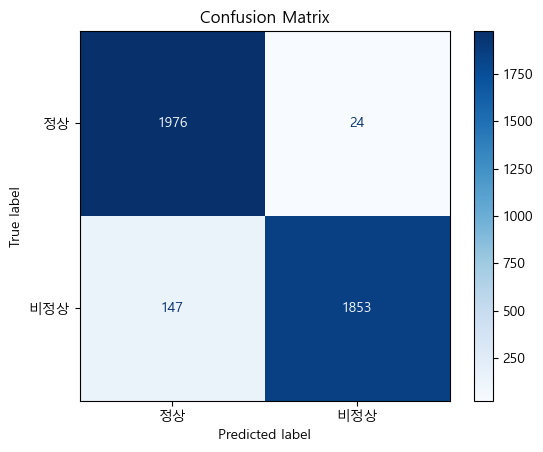

In [10]:
# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, dataloader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)
            pred = model(x)
            pred_label = (pred > 0.7).float().squeeze()

            y_true.extend(y.cpu().numpy())
            y_pred.extend(pred_label.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ï†ïÏÉÅ", "ÎπÑÏ†ïÏÉÅ"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Ïã§Ìñâ
plot_confusion_matrix(model, val_loader, device)


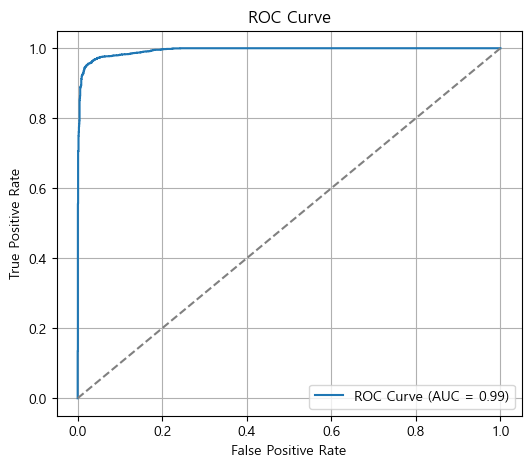

In [11]:
# ROC Ïª§Î∏å ÏãúÍ∞ÅÌôî
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, dataloader, device):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)
            pred = model(x)
            y_true.extend(y.cpu().numpy())
            y_scores.extend(pred.cpu().numpy())

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Ïã§Ìñâ
plot_roc_curve(model, val_loader, device)


In [12]:
# # Ïò§ÌÉêÏßÄ ÏÉòÌîå Ï∂îÏ∂ú
# def get_misclassified_samples(model, dataloader, device):
#     model.eval()
#     misclassified = []

#     with torch.no_grad():
#         for x, y in dataloader:
#             x = x.to(device)
#             y = y.to(device).unsqueeze(1)

#             preds = model(x)
#             pred_labels = (preds > 0.7).float()

#             for i in range(len(y)):
#                 true = y[i].item()
#                 pred = pred_labels[i].item()
#                 prob = preds[i].item()

#                 if true != pred:
#                     misclassified.append({
#                         'input': x[i].cpu(),  # 1xHxW
#                         'true': true,
#                         'pred': pred,
#                         'prob': prob
#                     })

#     return misclassified

# # Ïò§ÌÉêÏßÄ ÏÉòÌîå Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞ (validation Í∏∞Ï§Ä)
# misclassified_samples = get_misclassified_samples(model, val_loader, device)
# print(f"Ïò§ÌÉêÏßÄ ÏÉòÌîå Ïàò: {len(misclassified_samples)}Í∞ú")
# misclassified_samples

def get_misclassified_samples(model, dataloader, device):
    model.eval()
    misclassified = []

    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device).unsqueeze(1)

            preds = model(x)
            pred_labels = (preds > 0.7).float()

            for i in range(len(y)):
                true_label = y[i].item()
                pred_label = pred_labels[i].item()
                prob = preds[i].item()

                if true_label != pred_label:
                    misclassified.append({
                        'input': x[i].cpu(),  # (1, H, W)
                        'true': true_label,
                        'pred': pred_label,
                        'prob': prob
                    })

    return misclassified

# Ïò§ÌÉêÏßÄ ÏÉòÌîå ÎΩëÍ∏∞
misclassified_samples = get_misclassified_samples(model, val_loader, device)
print(f"Ïò§ÌÉêÏßÄ ÏÉòÌîå Í∞úÏàò: {len(misclassified_samples)}Í∞ú")


Ïò§ÌÉêÏßÄ ÏÉòÌîå Í∞úÏàò: 171Í∞ú


c:\Users\seohyun\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


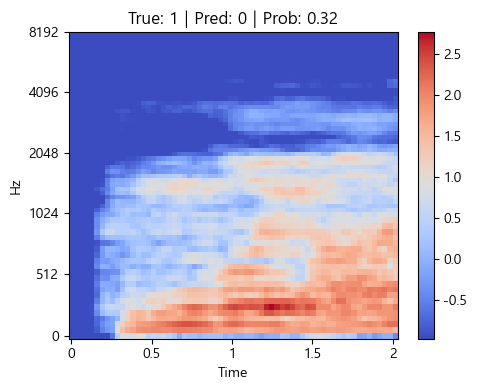

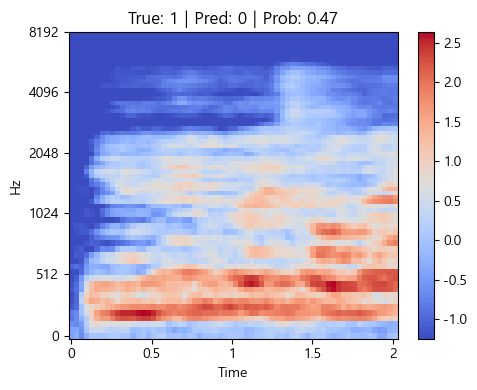

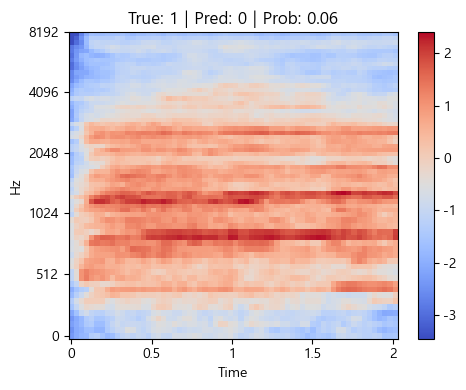

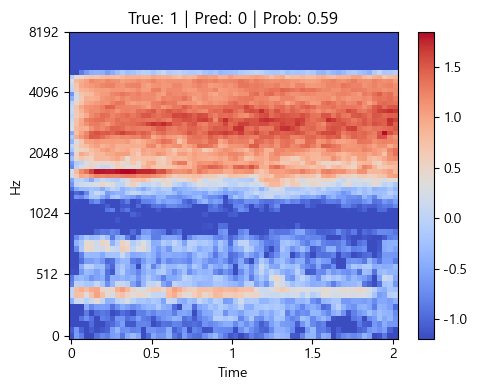

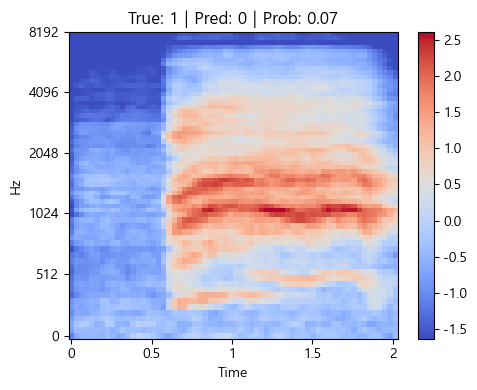

In [14]:
import librosa.display

def visualize_misclassified(misclassified, n=5):
    for i in range(min(n, len(misclassified))):
        sample = misclassified[i]
        plt.figure(figsize=(5, 4))

        # üîΩ Tensor ‚Üí numpy Î≥ÄÌôò Ï∂îÍ∞Ä
        spec = sample['input'].squeeze().cpu().numpy()

        librosa.display.specshow(spec, sr=16000, x_axis='time', y_axis='mel')
        plt.title(f"True: {int(sample['true'])} | Pred: {int(sample['pred'])} | Prob: {sample['prob']:.2f}")
        plt.colorbar()
        plt.tight_layout()
        plt.show()

# Ïò§ÌÉêÏßÄ ÏãúÍ∞ÅÌôî (5Í∞ú ÏòàÏãú)
visualize_misclassified(misclassified_samples, n=5)

In [ ]:
# Threshold ÌäúÎãù - ÏµúÏ†Å ÏûÑÍ≥ÑÍ∞í Ï∞æÍ∏∞
from sklearn.metrics import f1_score
best_th = 0.5
best_f1 = 0

for th in np.linspace(0.1, 0.9, 9):
    y_true, y_prob = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            y = y.to(device).unsqueeze(1)
            pred = model(x)
            y_true.extend(y.cpu().numpy())
            y_prob.extend(pred.cpu().numpy())

    preds = (np.array(y_prob) > th).astype(int)
    f1 = f1_score(y_true, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_th = th

print(f"Best F1: {best_f1:.4f} at threshold = {best_th}")


Best F1: 0.9625 at threshold = 0.7000000000000001
